In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv(r"C:\Users\Pc Planet\Downloads\aapl_us_2025.csv")


In [3]:
df['Date'] = pd.to_datetime(df['Date'])


In [4]:
df.head(10)


,Date,Open,High,Low,Close,Volume
0,1984-09-07,0.099824,0.101049,0.098619,0.099824,9.859472e+07
1,1984-09-10,0.099824,0.100130,0.097424,0.099232,7.652559e+07
2,1984-09-11,0.100130,0.102846,0.100130,0.101049,1.804519e+08
3,1984-09-12,0.101049,0.101641,0.098007,0.098007,1.576401e+08
4,1984-09-13,0.103460,0.103754,0.103460,0.103460,2.455186e+08
5,1984-09-14,0.103754,0.107360,0.103754,0.104950,2.923358e+08
6,1984-09-17,0.107676,0.109178,0.107676,0.107676,2.282506e+08
7,1984-09-18,0.107676,0.108565,0.103754,0.103754,1.152261e+08
8,1984-09-19,0.103754,0.104950,0.101641,0.101641,1.258628e+08
9,1984-09-20,0.101938,0.102846,0.101938,0.101938,7.835589e+07


In [5]:
df.tail(10)

,Date,Open,High,Low,Close,Volume
10161,2025-01-03,243.360,244.1800,241.890,243.36,40244114.0
10162,2025-01-06,244.310,247.3300,243.200,245.00,45045571.0
10163,2025-01-07,242.980,245.5500,241.350,242.21,40855960.0
10164,2025-01-08,241.920,243.7123,240.050,242.70,37628940.0
10165,2025-01-10,240.010,240.1600,233.000,236.85,61710856.0
10166,2025-01-13,233.530,234.6700,229.720,234.40,49630725.0
10167,2025-01-14,234.750,236.1200,232.472,233.28,39435294.0
10168,2025-01-15,234.635,238.9600,234.430,237.87,39831969.0
10169,2025-01-16,237.350,238.0100,228.030,228.26,71759052.0
10170,2025-01-17,232.115,232.2900,228.480,229.98,68488301.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10171 entries, 0 to 10170
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10171 non-null  datetime64[ns]
 1   Open    10171 non-null  float64       
 2   High    10171 non-null  float64       
 3   Low     10171 non-null  float64       
 4   Close   10171 non-null  float64       
 5   Volume  10171 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 476.9 KB


In [7]:
df.describe()

,Date,Open,High,Low,Close,Volume
count,10171,10171.000000,10171.000000,10171.000000,10171.000000,1.017100e+04
mean,2004-11-03 14:39:46.314029952,25.899876,26.174829,25.637547,25.918857,3.907497e+08
min,1984-09-07 00:00:00,0.054895,0.055497,0.054292,0.054292,2.838200e+06
25%,1994-09-27 12:00:00,0.290365,0.297102,0.284705,0.290206,1.371105e+08
50%,2004-11-02 00:00:00,0.951622,0.970583,0.922582,0.948656,2.573887e+08
75%,2014-12-08 12:00:00,22.188000,22.403300,21.935650,22.172700,4.950640e+08
max,2025-01-17 00:00:00,258.190000,260.100000,257.630000,259.020000,8.788463e+09
std,NaN,51.852504,52.391692,51.349332,51.900034,4.059731e+08


In [8]:
df.shape

(10171, 6)

In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [10]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [11]:
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)


In [12]:
df.tail(10)

,Date,Open,High,Low,Close,Volume,Target
10161,2025-01-03,243.360,244.1800,241.890,243.36,40244114.0,1
10162,2025-01-06,244.310,247.3300,243.200,245.00,45045571.0,0
10163,2025-01-07,242.980,245.5500,241.350,242.21,40855960.0,1
10164,2025-01-08,241.920,243.7123,240.050,242.70,37628940.0,0
10165,2025-01-10,240.010,240.1600,233.000,236.85,61710856.0,0
10166,2025-01-13,233.530,234.6700,229.720,234.40,49630725.0,0
10167,2025-01-14,234.750,236.1200,232.472,233.28,39435294.0,1
10168,2025-01-15,234.635,238.9600,234.430,237.87,39831969.0,0
10169,2025-01-16,237.350,238.0100,228.030,228.26,71759052.0,1
10170,2025-01-17,232.115,232.2900,228.480,229.98,68488301.0,0


In [13]:
X = df.drop(['Date', 'Target'], axis=1)
y = df['Target']


In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


In [15]:
#linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_lr = linear_model.predict(X_test)

print("LINEAR REGRESSION RESULTS")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))


LINEAR REGRESSION RESULTS
MAE: 0.4994254185013244
MSE: 0.24975603549199815
RMSE: 0.24975603549199815
R2 Score: 0.0006802530624636649


In [16]:
#decision tree classifier
model = DecisionTreeClassifier(random_state=42)


In [17]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [18]:
model.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=42)

In [19]:
y_pred = model.predict(X_test)


C:\Users\Pc Planet\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.4914004914004914


In [21]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[1000    0]
 [1035    0]]


In [22]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.49      1.00      0.66      1000
           1       0.00      0.00      0.00      1035

    accuracy                           0.49      2035
   macro avg       0.25      0.50      0.33      2035
weighted avg       0.24      0.49      0.32      2035



C:\Users\Pc Planet\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pc Planet\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pc Planet\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [23]:
from sklearn.tree import plot_tree

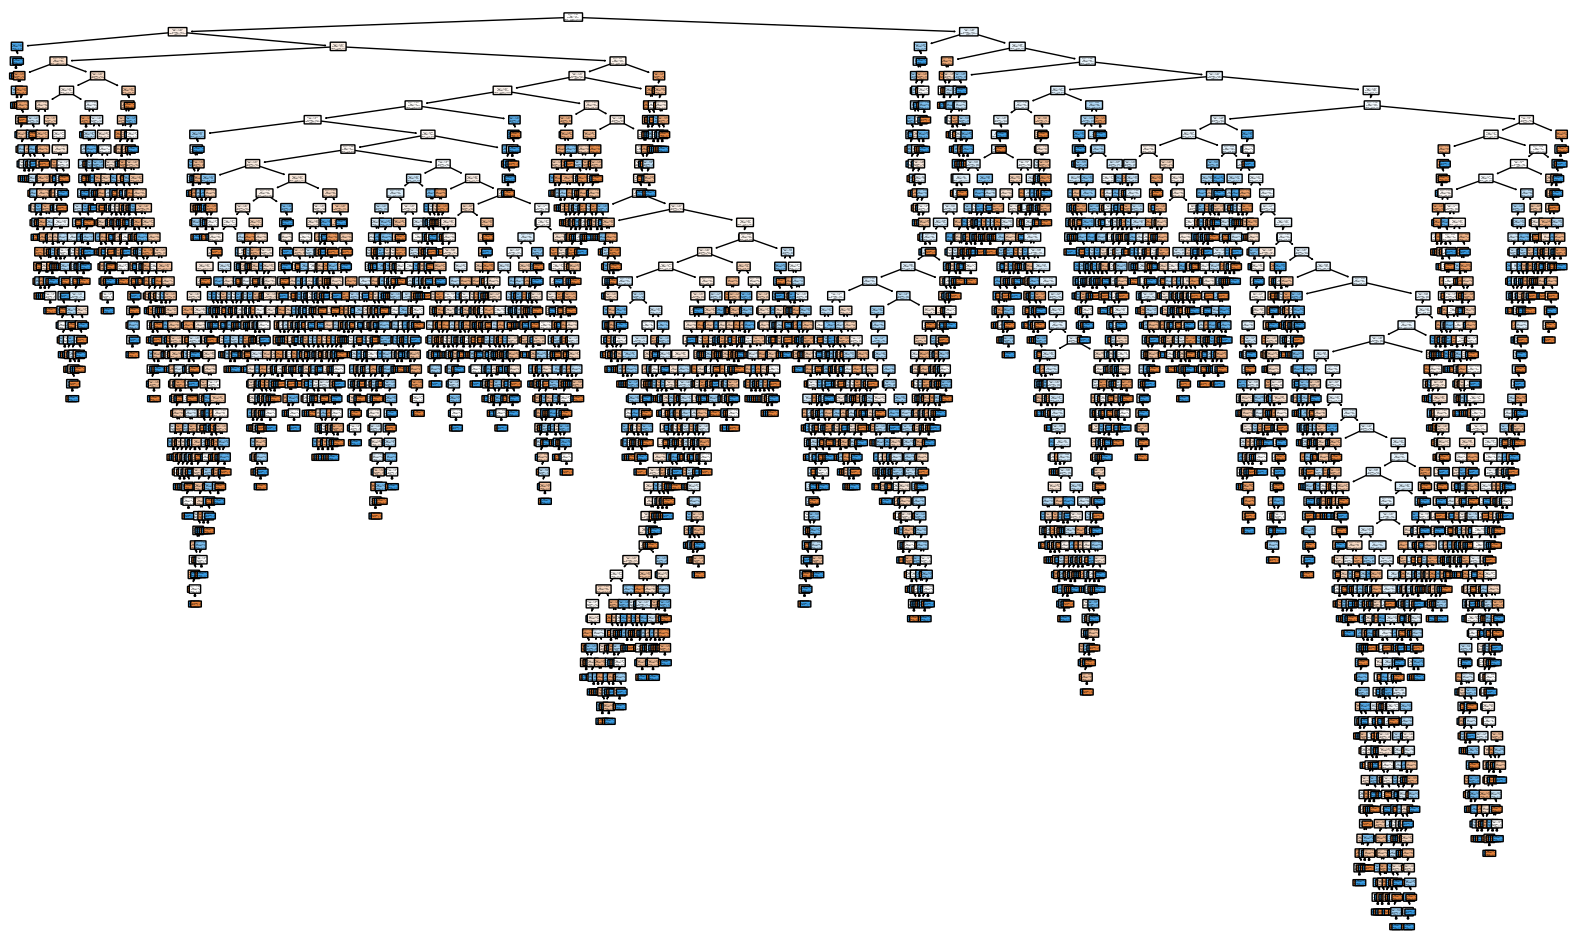

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,12))
plot_tree(
    model,
    filled=True,
    rounded=True,
    feature_names=None,       # remove or use a list if you have names
    class_names=[str(c) for c in np.unique(y_train)]  # list of class labels
)
plt.show()


In [25]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [27]:
y_pred = model.predict(X_test_scaled)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
 [[746 254]
 [757 278]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.75      0.60      1000
           1       0.52      0.27      0.35      1035

    accuracy                           0.50      2035
   macro avg       0.51      0.51      0.48      2035
weighted avg       0.51      0.50      0.47      2035



In [29]:
import joblib

joblib.dump(model,r'C:\Users\Pc Planet\Downloads\Uni\sem 5\ML\project\model.pkl')

['C:\\Users\\Pc Planet\\Downloads\\Uni\\sem 5\\ML\\project\\model.pkl']

In [30]:
import gradio as gr
import joblib
import numpy as np

# Load your trained model (Decision Tree Regressor or any regressor)
model = joblib.load(r'C:\\Users\\Pc Planet\\Downloads\\Uni\\sem 5\\ML\\project\\model.pkl')

# Define the prediction function
def predict_stock(Open, High, Low, Close, Volume):
    # Prepare features as a 2D numpy array
    features = np.array([[Open, High, Low,Close, Volume]])
    
    # Predict using the loaded model
    prediction = model.predict(features)
    
    return f"Predicted Stock Price: {prediction[0]:.2f}"

# Define Gradio inputs
inputs = [
    gr.Number(label="Open Price"),
    gr.Number(label="High Price"),
    gr.Number(label="Low Price"),
    gr.Number(label="Close"),
    gr.Number(label="Volume")
    
]

# Define Gradio output
output = gr.Textbox(label="Predicted Stock Price")

# Launch Gradio interface
gr.Interface(
    fn=predict_stock,
    inputs=inputs,
    outputs=output,
    title="Stock Price Prediction"
).launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
